In [541]:
# Importing some basic libraries

In [417]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [542]:
# Loading our dataset

In [418]:
df = pd.read_csv('database_IND.csv')

In [419]:
df.head(3)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019  generation_data_source  \
0                  NaN                  NaN                     NaN   
1                  NaN                  NaN                     NaN   
2                  NaN                  NaN                     NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  

[3 rows x 27 columns]

So our dataset has 27 columns

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

we have total 907 entries and 27 columns and also out of 27 columns 12 columns are in object datatype

In [421]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

so we have lots of null values in almost every columns.
estimated_generation_gwh,wepp_id,generation_gwh_2013,generation_gwh_2019,other_fuel2 and other_fuel_3, These columns has all the values are null. so it will
be better to drop these columns. apart from this generation_gwh(2014-2018) col has almost 50% null values. other_fuel1 col has 709 null values out of 907 values

In [543]:
# Dropping the columns having all the values are null 

In [422]:
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [423]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year  ...                                source  \
0                2011.0  ...  National Renewable Energy Laboratory   
1                   NaN  ...                  Ultratech Cement ltd   
2                   NaN  ...                                   CDM   
3                2004.0  ...         Central Electricity Authority   
4                2015.0  ...         Central Electricity Authority   
..                  ...  ...                                   ...   
902              2016.0  ...         Central Electricity Authority   
903                 NaN  ...   Karnataka Power Corporation Limited   
904                 NaN  ...                                   CDM   
905                 NaN  ...                    Hindustan Zinc ltd   
906                 NaN  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

     generation_gwh_2014  g

now we have 21 columns

In [424]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [544]:
# Dropping url colum.Because it has of no use 

In [425]:
df.drop('url',axis=1,inplace=True)

In [426]:
df.head(3)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  \
0   28.1839    73.2407        Solar         NaN              2011.0   
1   24.7663    74.6090         Coal         NaN                 NaN   
2   21.9038    69.3732         Wind         NaN                 NaN   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   

   generation_gwh_2017  generation_gwh_2018 generation_data_source  
0                  NaN                  NaN                    NaN  
1                  NaN                  NaN                    NaN  
2                  NaN                  NaN                    NaN

In [545]:
# year_of_capacity_data col has all the values are constant (2019) and rest are null values

In [427]:
df['year_of_capacity_data'].head(20)

0        NaN
1        NaN
2        NaN
3     2019.0
4     2019.0
5     2019.0
6     2019.0
7     2019.0
8     2019.0
9     2019.0
10    2019.0
11    2019.0
12    2019.0
13    2019.0
14    2019.0
15    2019.0
16    2019.0
17       NaN
18    2019.0
19       NaN
Name: year_of_capacity_data, dtype: float64

In [546]:
# country_long col is a constant col

In [428]:
df['country_long'].value_counts()

country_long
India    907
Name: count, dtype: int64

In [547]:
# country col is also constant col

In [429]:
df['country'].value_counts()

country
IND    907
Name: count, dtype: int64

In [548]:
# we can drop these cols

In [430]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [431]:
df.head(5)

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   
3          Gas         NaN              2004.0                   NaN   
4         Coal         Oil              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

In [432]:
df.geolocation_source.value_counts()

geolocation_source
WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

In [433]:
df.name.head(20)

0             ACME Solar Tower
1          ADITYA CEMENT WORKS
2     AES Saurashtra Windfarms
3                  AGARTALA GT
4                 AKALTARA TPP
5                 AKRIMOTA LIG
6                       ALIYAR
7              ALLAIN DUHANGAN
8                  ALMATTI DAM
9                  AMAR KANTAK
10               AMARAVATI TPP
11      ANANDPUR SAHIB ST-I&II
12                 ANAPARA "C"
13                      ANDHRA
14           ANOOPGARH ST I&II
15                      ANPARA
16                     ANTA GT
17                     ANUPPUR
18                  ANUPUR TPP
19           ARVINDNAGAR SUGAR
Name: name, dtype: object

In [549]:
# gppd_idnr col has all the values are unique codes. so it will not give us that much values for the prediction 

In [434]:
df.gppd_idnr.head(20)

0     WRI1020239
1     WRI1019881
2     WRI1026669
3     IND0000001
4     IND0000002
5     IND0000003
6     IND0000004
7     IND0000005
8     IND0000006
9     IND0000007
10    IND0000008
11    IND0000009
12    IND0000010
13    IND0000011
14    IND0000012
15    IND0000013
16    IND0000014
17    WRI1019996
18    IND0000015
19    WRI1019938
Name: gppd_idnr, dtype: object

In [550]:
# Dropping these cols

In [435]:
df.drop(['gppd_idnr','name'],axis=1,inplace=True)

In [436]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

In [551]:
# checking generation_gwh columns for all the years

In [437]:
df[['generation_gwh_2014',	'generation_gwh_2015',	'generation_gwh_2016',	'generation_gwh_2017',	'generation_gwh_2018']]	.head(20)

generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3            617.789264           843.747000           886.004428   
4           3035.550000          5916.370000          6243.000000   
5           1153.421000          1208.852000          1175.765000   
6            157.558250           152.195200            61.421350   
7            674.391100           721.335200           675.724400   
8            480.594950           144.434200           402.029750   
9           1887.904000          1643.046000          1338.093000   
10          1920.971000          5629.663000          1701.008000   
11           614.412500           665.197300           670.500650   
12          7744.000000          8076.810500          7902.021600   
13                  NaN                  NaN                  NaN   
14                  NaN                  NaN                  NaN   
15          9670.879000         11151.069472         13227.352350   
16          1611.987000           909.000000           666.420000   
17                  NaN                  NaN                  NaN   
18                  NaN          2702.823200          3515.749600   
19                  NaN                  NaN                  NaN   

    generation_gwh_2017  generation_gwh_2018  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3            663.774500           626.239128  
4           5385.579736          7279.000000  
5           1147.913000           976.655000  
6             89.629600            48.327150  
7            679.594950           579.318850  
8            439.372100           406.377900  
9           1563.457000          1487.880000  
10          4350.558000          3717.154000  
11           644.570950           425.641100  
12          7940.740000          7873.973000  
13                  NaN                  NaN  
14                  NaN                  NaN  
15         15334.876300         18697.655900  
16           430.000000           528.280000  
17                  NaN                  NaN  
18          5777.120000          6241.801000  
19                  NaN                  NaN

In [552]:
# owner and source col has of no use. so we can drop these cols 

In [438]:
df.drop(['owner','source'],axis=1,inplace=True)

In [439]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                    geolocation_source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                                   WRI   
2                 NaN                                   WRI   
3              2004.0                                   WRI   
4              2015.0                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

In [553]:
# other_fuel1 col has lots of values are null. I replce all the null values with None 

In [440]:
df['other_fuel1'].fillna('None', inplace=True)

In [441]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [442]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [443]:
df

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  year_of_capacity_data  \
0                2011.0                 1.0                    NaN   
1                   NaN                 2.0                    NaN   
2                   NaN                 2.0                    NaN   
3                2004.0                 2.0                 2019.0   
4                2015.0                 2.0                 2019.0   
..                  ...                 ...                    ...   
902              2016.0                 2.0                 2019.0   
903                 NaN                 0.0                    NaN   
904                 NaN                 2.0                    NaN   
905                 NaN                 2.0                    NaN   
906                 NaN                 2.0                    NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902                  NaN             0.994875           233.596650   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018  generation_data_source  
0                    NaN                  NaN                     NaN  
1                    NaN                  NaN                     NaN  
2                    NaN                  NaN                     NaN  
3             663.774500           626.239128                     0.0  
4            5385.579736          7279.000000                     0.0  
..                   ...                  ...                     ...  
902           865.400000           686.500000                     0.0  
903                  NaN                  NaN                     NaN  
904                  NaN                  NaN                     NaN  
905                  NaN                  NaN                     NaN  
906                  NaN                  NaN                     NaN  

[907 rows x 14 columns]

Now we have 907 rows and 14 cols

In [554]:
# generation_data_source col has all the values are 0 and rest are the null values

In [446]:
df.generation_data_source.value_counts()

generation_data_source
0.0    449
Name: count, dtype: int64

In [555]:
# year_of_capacity_data col has all the values are 2019 and rest are the null values

In [447]:
df.year_of_capacity_data.value_counts()

year_of_capacity_data
2019.0    519
Name: count, dtype: int64

In [556]:
# dropping year_of_capacity_data col

In [448]:
df.drop('year_of_capacity_data',axis=1,inplace =True)

In [449]:
df

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0                2011.0                 1.0                  NaN   
1                   NaN                 2.0                  NaN   
2                   NaN                 2.0                  NaN   
3                2004.0                 2.0           617.789264   
4                2015.0                 2.0          3035.550000   
..                  ...                 ...                  ...   
902              2016.0                 2.0                  NaN   
903                 NaN                 0.0                  NaN   
904                 NaN                 2.0                  NaN   
905                 NaN                 2.0                  NaN   
906                 NaN                 2.0                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  generation_data_source  
0                    NaN                     NaN  
1                    NaN                     NaN  
2                    NaN                     NaN  
3             626.239128                     0.0  
4            7279.000000                     0.0  
..                   ...                     ...  
902           686.500000                     0.0  
903                  NaN                     NaN  
904                  NaN                     NaN  
905                  NaN                     NaN  
906                  NaN                     NaN  

[907 rows x 13 columns]

In [557]:
# Lets fill the null values by using KNN Imputer 

In [450]:
from sklearn.impute import KNNImputer
ncols = df.select_dtypes(include=[np.number])
KNNI = KNNImputer(n_neighbors=7)
df_new = KNNI.fit_transform(ncols)
df_new = pd.DataFrame(df_new, columns=ncols.columns)

In [451]:
df_new

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0           2011.000000                 1.0            46.392586   
1           1998.571429                 2.0           301.027714   
2           1995.285714                 2.0            79.692236   
3           2004.000000                 2.0           617.789264   
4           2015.000000                 2.0          3035.550000   
..                  ...                 ...                  ...   
902         2016.000000                 2.0           681.787314   
903         1997.571429                 0.0            51.633393   
904         1992.000000                 2.0            56.584229   
905         1983.000000                 2.0           342.744807   
906         1985.857143                 2.0            83.081079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              42.974050            27.230307            30.877693   
1             208.235857           238.973355           255.983293   
2              46.771050            58.762993            36.057807   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903            38.539193            16.551114            21.145171   
904            42.182314            19.955436            21.145171   
905           289.056029           309.435050           304.360550   
906            52.337000            31.480379            45.431700   

     generation_gwh_2018  generation_data_source  
0              57.127214                     0.0  
1             288.862764                     0.0  
2              24.986807                     0.0  
3             626.239128                     0.0  
4            7279.000000                     0.0  
..                   ...                     ...  
902           686.500000                     0.0  
903            52.875721                     0.0  
904            52.875721                     0.0  
905           370.176957                     0.0  
906            71.084221                     0.0  

[907 rows x 13 columns]

In [558]:
# commissioning_year col has changed. It comes with decimal points. so I am using round() function to make it a whole number and then converting it into integer

In [452]:
# Round the year values to remove the decimal points
df_new['commissioning_year'] = df_new['commissioning_year'].round().astype(int)


In [453]:
df_new

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0                  2011                 1.0            46.392586   
1                  1999                 2.0           301.027714   
2                  1995                 2.0            79.692236   
3                  2004                 2.0           617.789264   
4                  2015                 2.0          3035.550000   
..                  ...                 ...                  ...   
902                2016                 2.0           681.787314   
903                1998                 0.0            51.633393   
904                1992                 2.0            56.584229   
905                1983                 2.0           342.744807   
906                1986                 2.0            83.081079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              42.974050            27.230307            30.877693   
1             208.235857           238.973355           255.983293   
2              46.771050            58.762993            36.057807   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903            38.539193            16.551114            21.145171   
904            42.182314            19.955436            21.145171   
905           289.056029           309.435050           304.360550   
906            52.337000            31.480379            45.431700   

     generation_gwh_2018  generation_data_source  
0              57.127214                     0.0  
1             288.862764                     0.0  
2              24.986807                     0.0  
3             626.239128                     0.0  
4            7279.000000                     0.0  
..                   ...                     ...  
902           686.500000                     0.0  
903            52.875721                     0.0  
904            52.875721                     0.0  
905           370.176957                     0.0  
906            71.084221                     0.0  

[907 rows x 13 columns]

In [559]:
# Generation_data_source col has all the values are 0. its an constant col

In [454]:
df_new.generation_data_source.value_counts()

generation_data_source
0.0    907
Name: count, dtype: int64

In [560]:
# Dropping generation_data_source col

In [455]:
df_new.drop('generation_data_source',axis=1,inplace=True)

In [456]:
df_new

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0                  2011                 1.0            46.392586   
1                  1999                 2.0           301.027714   
2                  1995                 2.0            79.692236   
3                  2004                 2.0           617.789264   
4                  2015                 2.0          3035.550000   
..                  ...                 ...                  ...   
902                2016                 2.0           681.787314   
903                1998                 0.0            51.633393   
904                1992                 2.0            56.584229   
905                1983                 2.0           342.744807   
906                1986                 2.0            83.081079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              42.974050            27.230307            30.877693   
1             208.235857           238.973355           255.983293   
2              46.771050            58.762993            36.057807   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903            38.539193            16.551114            21.145171   
904            42.182314            19.955436            21.145171   
905           289.056029           309.435050           304.360550   
906            52.337000            31.480379            45.431700   

     generation_gwh_2018  
0              57.127214  
1             288.862764  
2              24.986807  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903            52.875721  
904            52.875721  
905           370.176957  
906            71.084221  

[907 rows x 12 columns]

In [457]:
df=df_new

In [458]:
df

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0                  2011                 1.0            46.392586   
1                  1999                 2.0           301.027714   
2                  1995                 2.0            79.692236   
3                  2004                 2.0           617.789264   
4                  2015                 2.0          3035.550000   
..                  ...                 ...                  ...   
902                2016                 2.0           681.787314   
903                1998                 0.0            51.633393   
904                1992                 2.0            56.584229   
905                1983                 2.0           342.744807   
906                1986                 2.0            83.081079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              42.974050            27.230307            30.877693   
1             208.235857           238.973355           255.983293   
2              46.771050            58.762993            36.057807   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903            38.539193            16.551114            21.145171   
904            42.182314            19.955436            21.145171   
905           289.056029           309.435050           304.360550   
906            52.337000            31.480379            45.431700   

     generation_gwh_2018  
0              57.127214  
1             288.862764  
2              24.986807  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903            52.875721  
904            52.875721  
905           370.176957  
906            71.084221  

[907 rows x 12 columns]

In [459]:
df.other_fuel1.value_counts()

other_fuel1
2.0    709
3.0    195
1.0      2
0.0      1
Name: count, dtype: int64

In [460]:
df

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          3.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          3.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0                  2011                 1.0            46.392586   
1                  1999                 2.0           301.027714   
2                  1995                 2.0            79.692236   
3                  2004                 2.0           617.789264   
4                  2015                 2.0          3035.550000   
..                  ...                 ...                  ...   
902                2016                 2.0           681.787314   
903                1998                 0.0            51.633393   
904                1992                 2.0            56.584229   
905                1983                 2.0           342.744807   
906                1986                 2.0            83.081079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              42.974050            27.230307            30.877693   
1             208.235857           238.973355           255.983293   
2              46.771050            58.762993            36.057807   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903            38.539193            16.551114            21.145171   
904            42.182314            19.955436            21.145171   
905           289.056029           309.435050           304.360550   
906            52.337000            31.480379            45.431700   

     generation_gwh_2018  
0              57.127214  
1             288.862764  
2              24.986807  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903            52.875721  
904            52.875721  
905           370.176957  
906            71.084221  

[907 rows x 12 columns]

In [561]:
# values counts for all the columns

In [461]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64


latitude
24.1917    3
19.0004    3
25.5177    2
8.7635     2
15.2761    2
          ..
23.2080    1
26.5255    1
22.7532    1
21.2261    1
9.9344     1
Name: count, Length: 879, dtype: int64


longitude
71.6917    4
71.6918    3
75.8988    3
81.2875    3
72.8983    3
          ..
87.2635    1
74.4385    1
79.8265    1
76.9717    1
77.4768    1
Name: count, Length: 869, dtype: int64


primary_fuel
1.0    258
3.0    251
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: count, dtype: int64


other_fuel1
2.0    709
3.0    195
1.0      2
0.0      1
Name: count, dtype: int64


commissioning_year
1988    57
1980    34
1990    33
1985    33
1995    31
        ..
1958     1
1946     1
1956     1
1949     1
1953     1
Name: count, Length: 73, dtype: int64


geolocation_source
2.000

## Bivariate analysis

In [562]:
# Plotting scatterplot to check the relationship between the cols

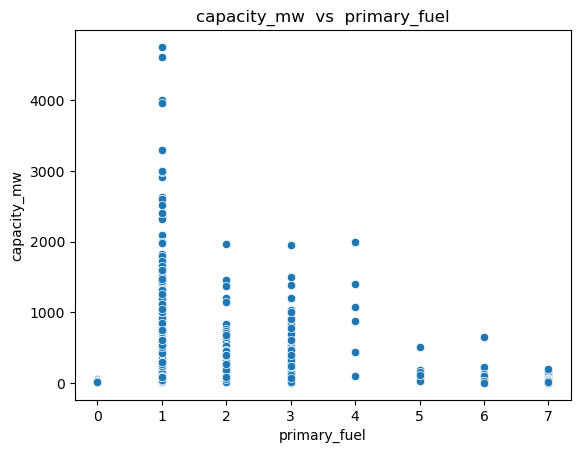

In [462]:
plt.title('capacity_mw  vs  primary_fuel')
sns.scatterplot(y='capacity_mw',x='primary_fuel',data= df ,palette= "bright" )
plt.show()

so capacity is high when the primary fuel is coal

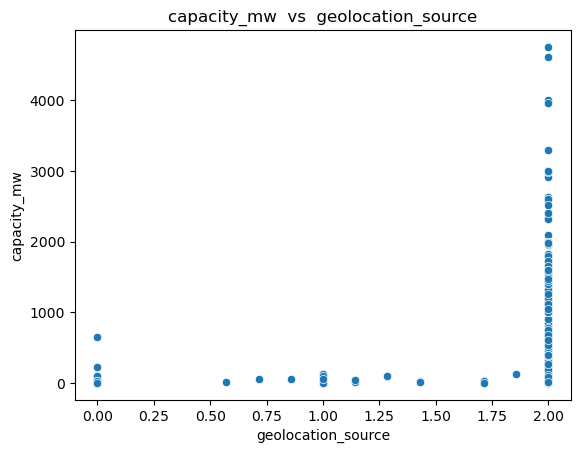

In [463]:
plt.title('capacity_mw  vs  geolocation_source')
sns.scatterplot(y='capacity_mw',x='geolocation_source',data= df ,palette= "bright" )
plt.show()

So for WRI capacity is maximum

In [563]:
# Plotting scatter plot to check the relationship between all the cols with capacity col

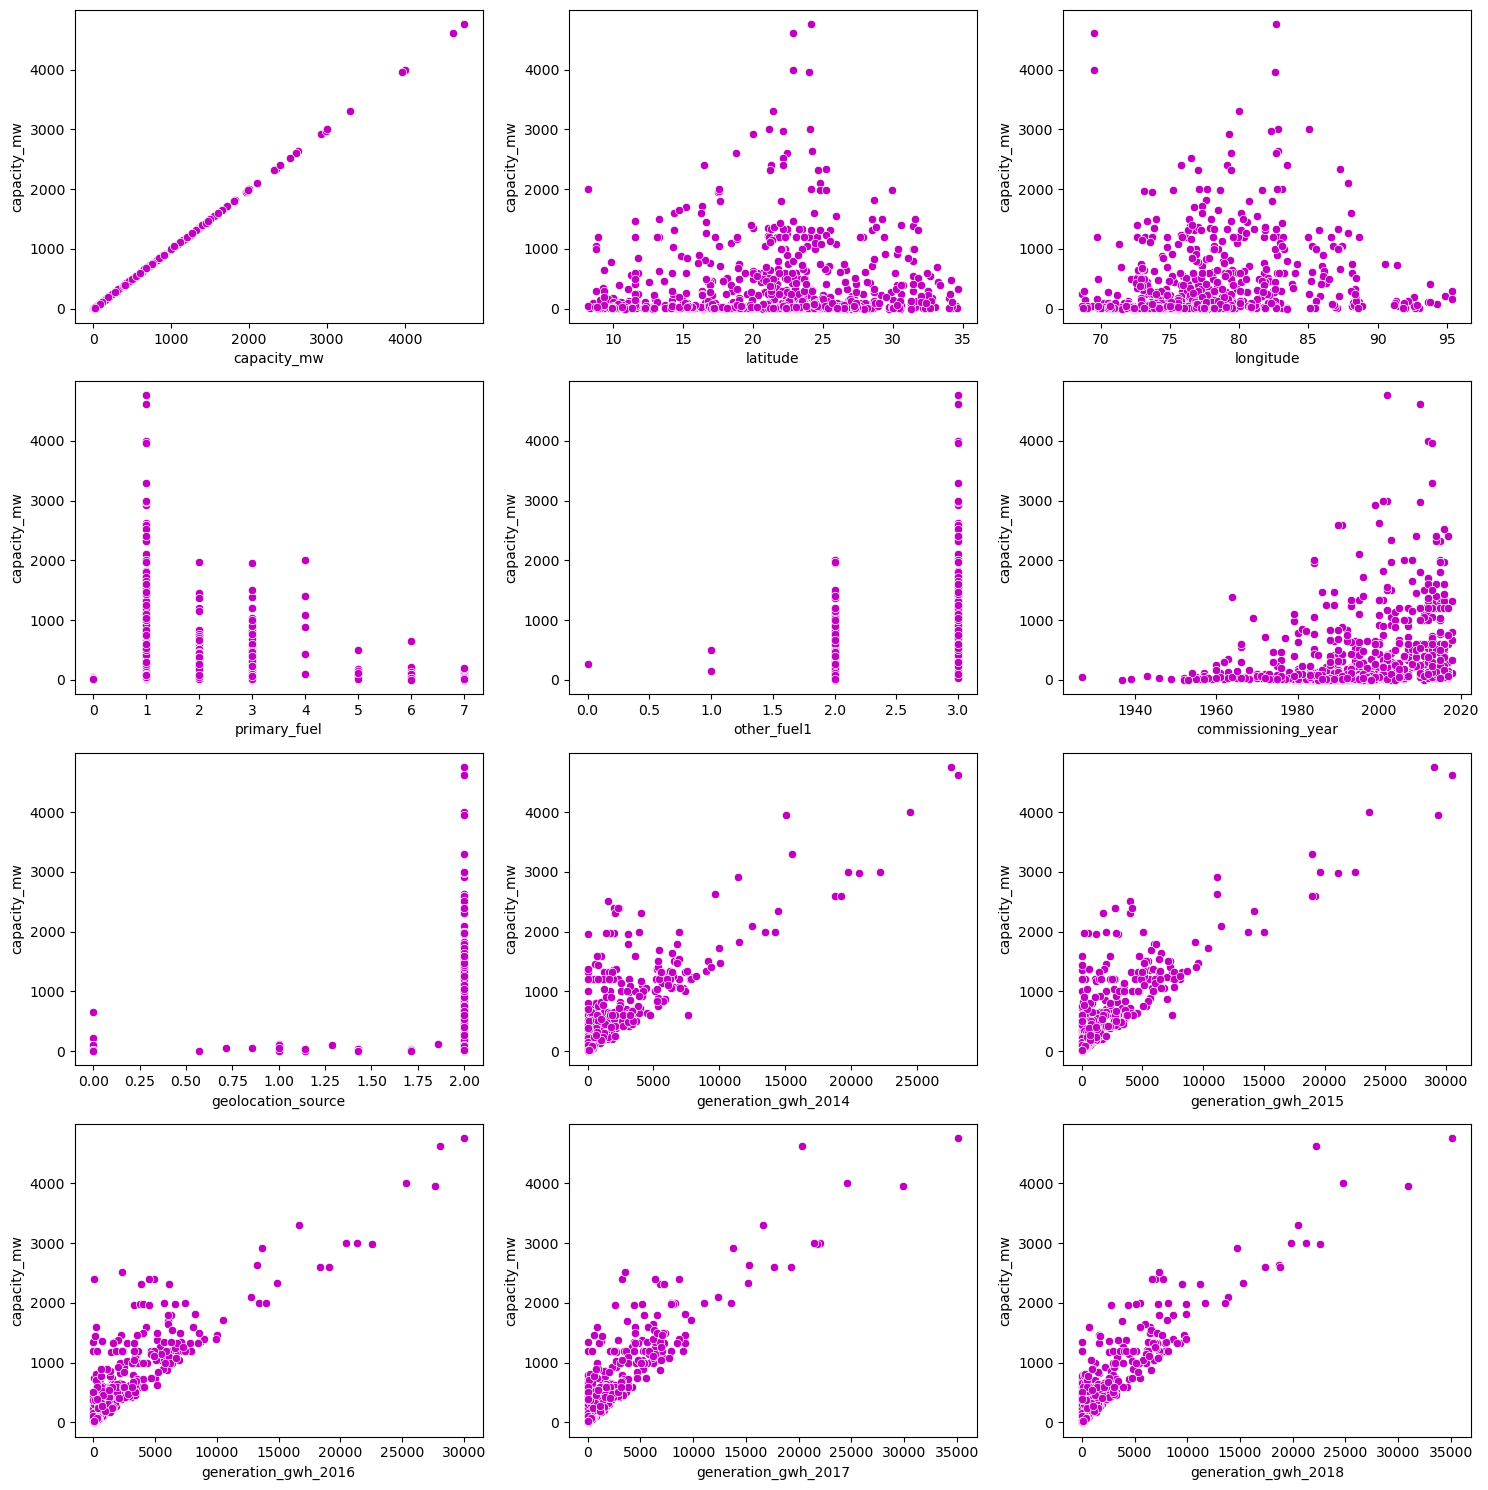

In [464]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.scatterplot(x=i,y='capacity_mw',data=df,color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

So when other_fuel1 is OIL then capacity is maximum.
And capacity is linearly realted with generation_gwh(2014-2018) and it is positive
latitude and longitude is not lineraly related with the capacity
capacity is increasing for the latest commissioning year (positively related)

In [465]:
df.describe()

capacity_mw    latitude   longitude  primary_fuel  other_fuel1  \
count   907.000000  907.000000  907.000000    907.000000   907.000000   
mean    326.223755   21.209009   77.372292      3.206174     2.210584   
std     590.085456    6.109763    4.844628      2.280652     0.421260   
min       0.000000    8.168900   68.644700      0.000000     0.000000   
25%      16.725000   17.046900   74.253850      1.000000     2.000000   
50%      59.200000   21.658000   76.627900      3.000000     2.000000   
75%     385.250000   25.287471   79.233050      6.000000     2.000000   
max    4760.000000   34.649000   95.408000      7.000000     3.000000   

       commissioning_year  geolocation_source  generation_gwh_2014  \
count          907.000000          907.000000           907.000000   
mean          1993.837927            1.722003          1187.408612   
std             14.361509            0.679744          2912.935374   
min           1927.000000            0.000000             0.000000   
25%           1986.000000            2.000000            67.093561   
50%           1993.000000            2.000000           133.568800   
75%           2005.000000            2.000000           794.587100   
max           2018.000000            2.000000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           907.000000           907.000000           907.000000   
mean           1212.394443          1242.843986          1294.197894   
std            3096.712339          3121.375302          3179.831759   
min               0.000000             0.000000             0.000000   
25%              57.267936            50.073375            46.089821   
50%             100.899983           102.201850            96.664250   
75%             711.181225           737.205450           817.977250   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  
count           907.000000  
mean           1352.137059  
std            3286.524506  
min               0.000000  
25%              66.695561  
50%             114.099321  
75%             837.129594  
max           35136.000000

['capacity_mw', 'longitude', 'other_fuel1', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
these columns has positive skewness because mean is greater than median. And geolocation_source column has negative skewness because here mean is less than median

In [564]:
# Plotting distplot to check the distribution of all the cols

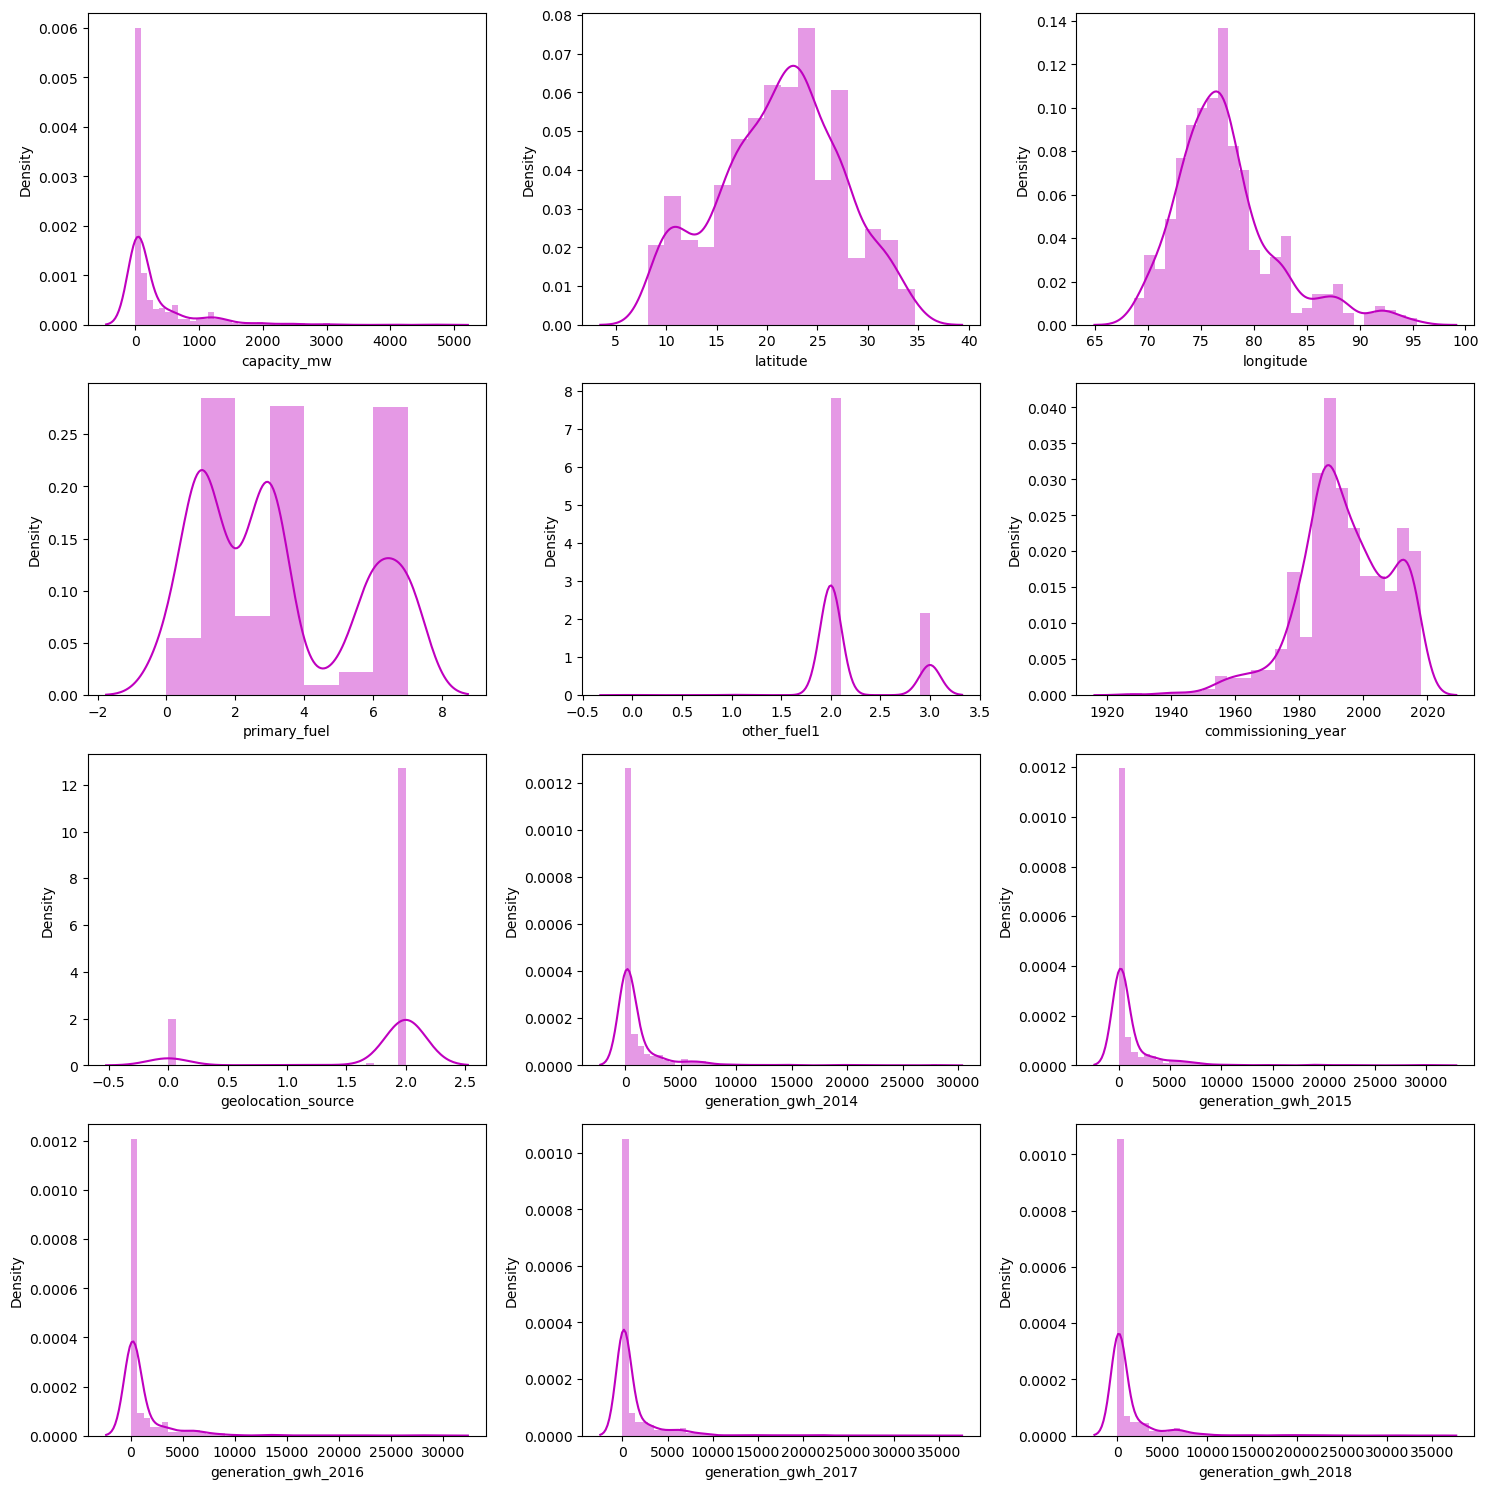

In [466]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

['capacity_mw', 'longitude', 'other_fuel1', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
these columns has skewness present

In [565]:
# checking skewness for all the cols

In [467]:
df.skew()

capacity_mw            3.123576
latitude              -0.149412
longitude              1.167067
primary_fuel           0.472251
other_fuel1            1.109169
commissioning_year    -0.571102
geolocation_source    -2.100587
generation_gwh_2014    4.955426
generation_gwh_2015    5.244608
generation_gwh_2016    4.986306
generation_gwh_2017    4.977092
generation_gwh_2018    4.853232
dtype: float64

In [566]:
# separating skewed col and normal col. Thresold value is above 0.5 and below -0.5

In [468]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() >0.5) or (df[i].skew() <-0.5):
        skewed_col.append(i)
    else:
        normal_col.append(i)

print('skewed_col is :',skewed_col)
print('\n')
print("Normal_col is :",normal_col)

skewed_col is : ['capacity_mw', 'longitude', 'other_fuel1', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


Normal_col is : ['latitude', 'primary_fuel']


In [567]:
# Removing skewness by using cube root technique

In [469]:
for i in skewed_col:
    df[i]=np.cbrt(df[i])

In [470]:
df.skew()

capacity_mw            1.013378
latitude              -0.149412
longitude              1.031625
primary_fuel           0.472251
other_fuel1           -2.761178
commissioning_year    -0.589479
geolocation_source    -2.167997
generation_gwh_2014    1.572277
generation_gwh_2015    1.615497
generation_gwh_2016    1.545908
generation_gwh_2017    1.490143
generation_gwh_2018    1.516118
dtype: float64

Now we can see that skewness is almost removed

In [569]:
# plotting kde plot to check the skewness for all the cols

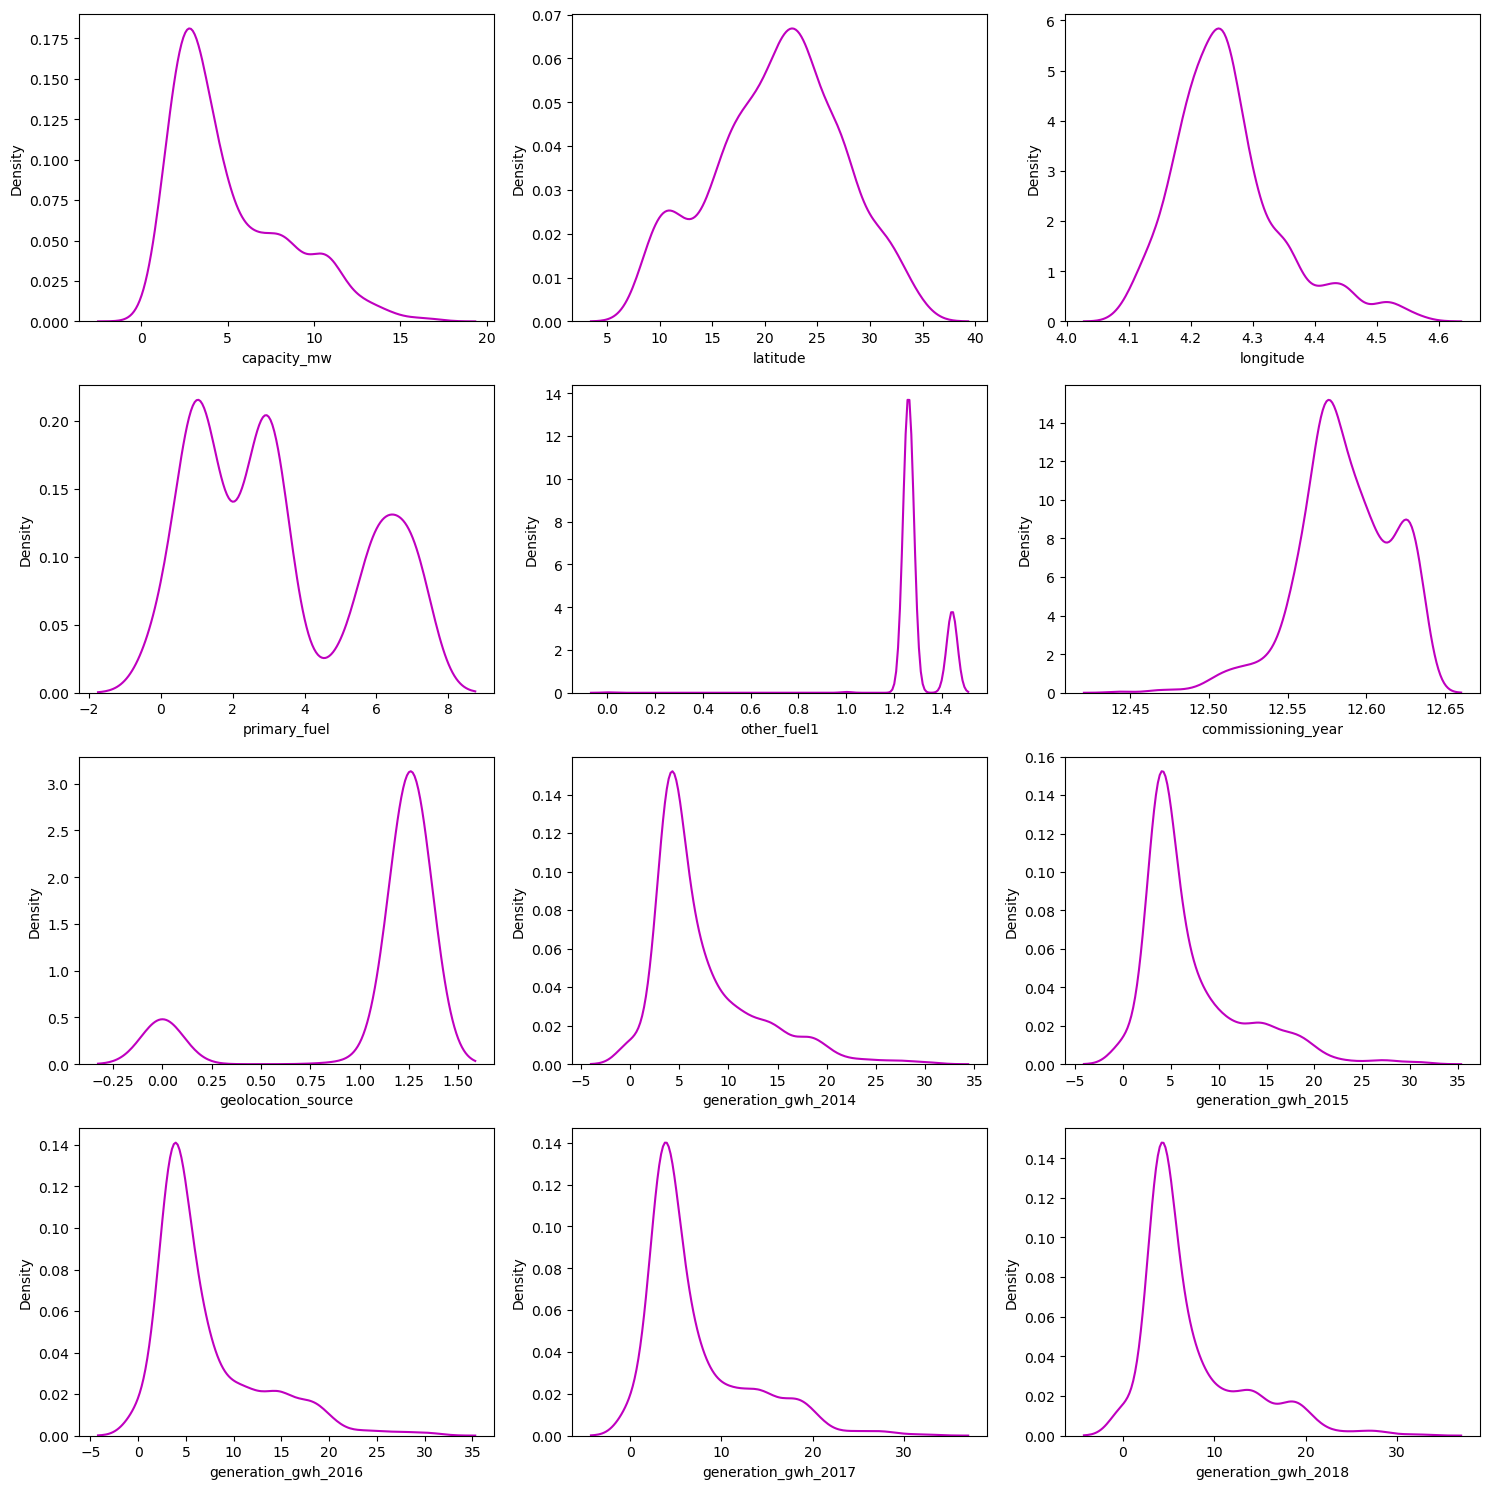

In [471]:
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=12:
        ax=plt.subplot(4,3,plotnum)
        sns.kdeplot(df[i],color='m')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

still skewness present but comapretively less than before

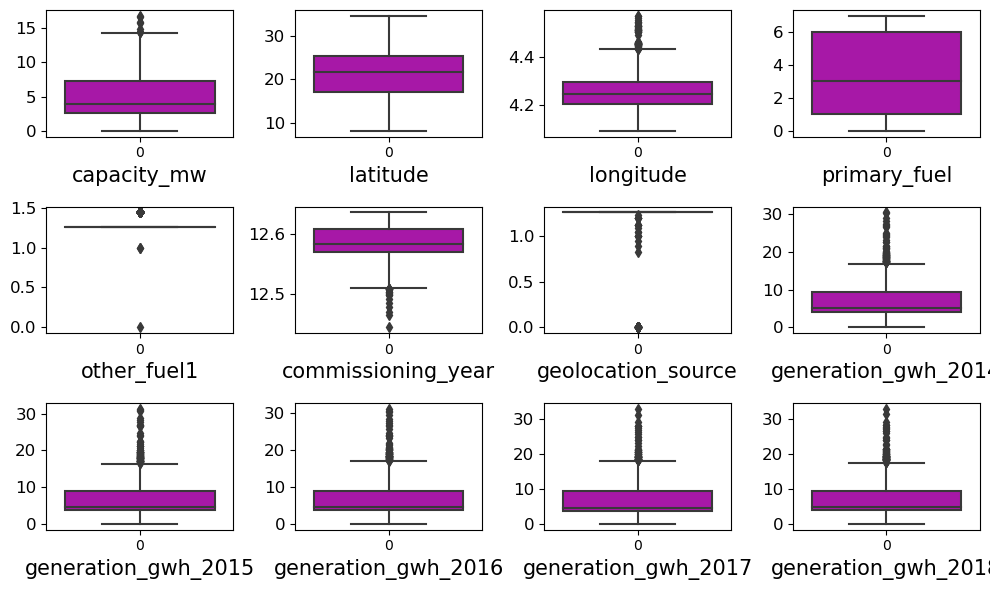

In [472]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

So we can see that all the generation_gwh columns has outliers present and slightly less outliers present in geolocation_source,commissioning_year and longitude column

In [473]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [474]:
a=['latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018']

In [475]:
cur = df[a]

In [570]:
# Removing outliers by using zscore method

In [476]:
from scipy.stats import zscore
z=np.abs(zscore(cur))
print(np.where(z>3))

(array([ 15,  15,  15, 143, 143, 143, 179, 183, 209, 244, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 364, 364, 364, 364, 364, 416, 427,
       478, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 519, 538,
       573, 577, 601, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 695, 695, 695, 695, 695, 709, 721, 721, 721, 724, 724, 724,
       726, 726, 726, 726, 726, 728, 786, 786, 786, 786, 786, 808, 808,
       808, 808, 808, 811, 813, 817, 818, 880, 880, 880, 880, 880],
      dtype=int64), array([ 8,  9, 10,  8,  9, 10,  1,  1,  6,  1,  6,  7,  8,  9, 10,  1,  1,
        1,  1,  6,  7,  8,  9, 10,  1,  1,  4,  6,  7,  8,  9, 10,  6,  7,
        8,  9, 10,  1,  4,  4,  1,  4,  1,  6,  7,  8,  9, 10,  6,  7,  8,
        9, 10,  6,  7,  8,  9, 10,  4,  6,  7,  8,  6,  7,  8,  6,  7,  8,
        9, 10,  4,  6,  7,  8,  9, 10,  6,  7,  8,  9, 10,  3,  3,  3,  1,
        6,  7,  8,  9, 10], dtype=int64))


In [477]:
df_new= df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0       1.357209   28.1839   4.183928           6.0     1.259921   
1       4.610436   24.7663   4.209822           1.0     1.259921   
2       3.396999   21.9038   4.108947           7.0     1.259921   
3       5.129928   23.8712   4.503868           2.0     1.259921   
4      12.164404   21.9603   4.351694           1.0     1.442250   
..           ...       ...        ...           ...          ...   
902    11.696071   16.2949   4.260882           1.0     1.442250   
903     1.442250   12.8932   4.275677           6.0     1.259921   
904     2.943383   15.2758   4.228027           7.0     1.259921   
905     4.308869   24.3500   4.193560           1.0     1.259921   
906     2.545822    9.9344   4.263084           7.0     1.259921   

     commissioning_year  geolocation_source  generation_gwh_2014  \
0             12.622267            1.000000             3.593212   
1             12.597110            1.259921             6.701965   
2             12.588702            1.259921             4.303337   
3             12.607604            1.259921             8.516872   
4             12.630630            1.259921            14.479241   
..                  ...                 ...                  ...   
902           12.632719            1.259921             8.801357   
903           12.595009            0.000000             3.723719   
904           12.582389            1.259921             3.839121   
905           12.563411            1.259921             6.998264   
906           12.569743            1.259921             4.363491   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               3.502693             3.008506             3.137244   
1               5.927231             6.205591             6.349466   
2               3.602957             3.887777             3.303694   
3               9.449397             9.604586             8.723154   
4              18.086385            18.413278            17.528476   
..                   ...                  ...                  ...   
902             0.998289             6.158697             9.529548   
903             3.377802             2.548448             2.765267   
904             3.481049             2.712400             2.765267   
905             6.611916             6.763786             6.726608   
906             3.740557             3.157524             3.568231   

     generation_gwh_2018  
0               3.851362  
1               6.610442  
2               2.923503  
3               8.555526  
4              19.380155  
..                   ...  
902             8.821590  
903             3.753347  
904             3.753347  
905             7.180199  
906             4.142454  

[869 rows x 12 columns]

In [540]:
df_new['capacity_mw'][169]

3.2316520350478255

In [478]:
df=df_new

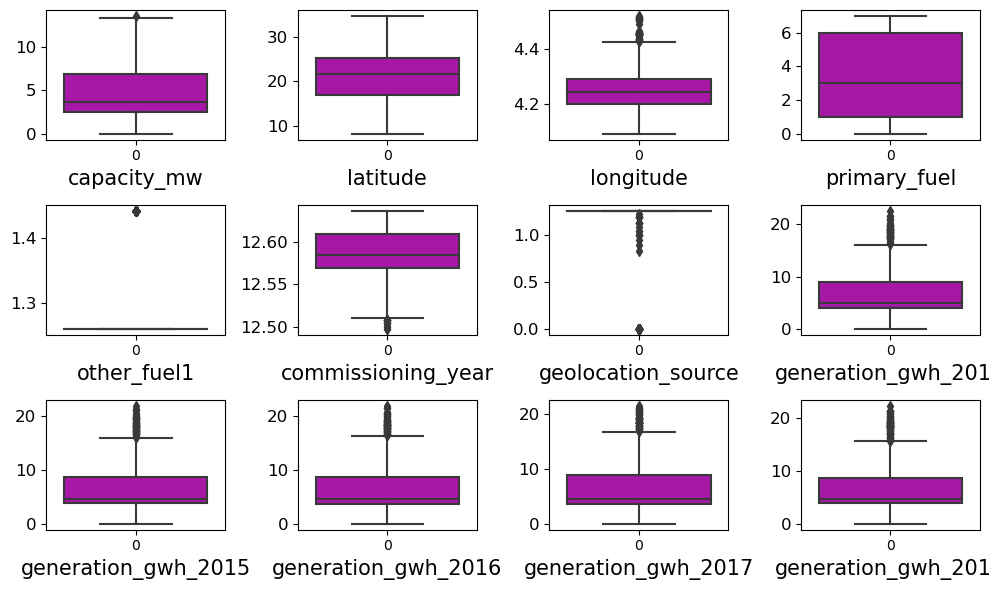

In [479]:
# Lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

Now very less outliers are present in our dataset

In [591]:
# Plotting pairplot

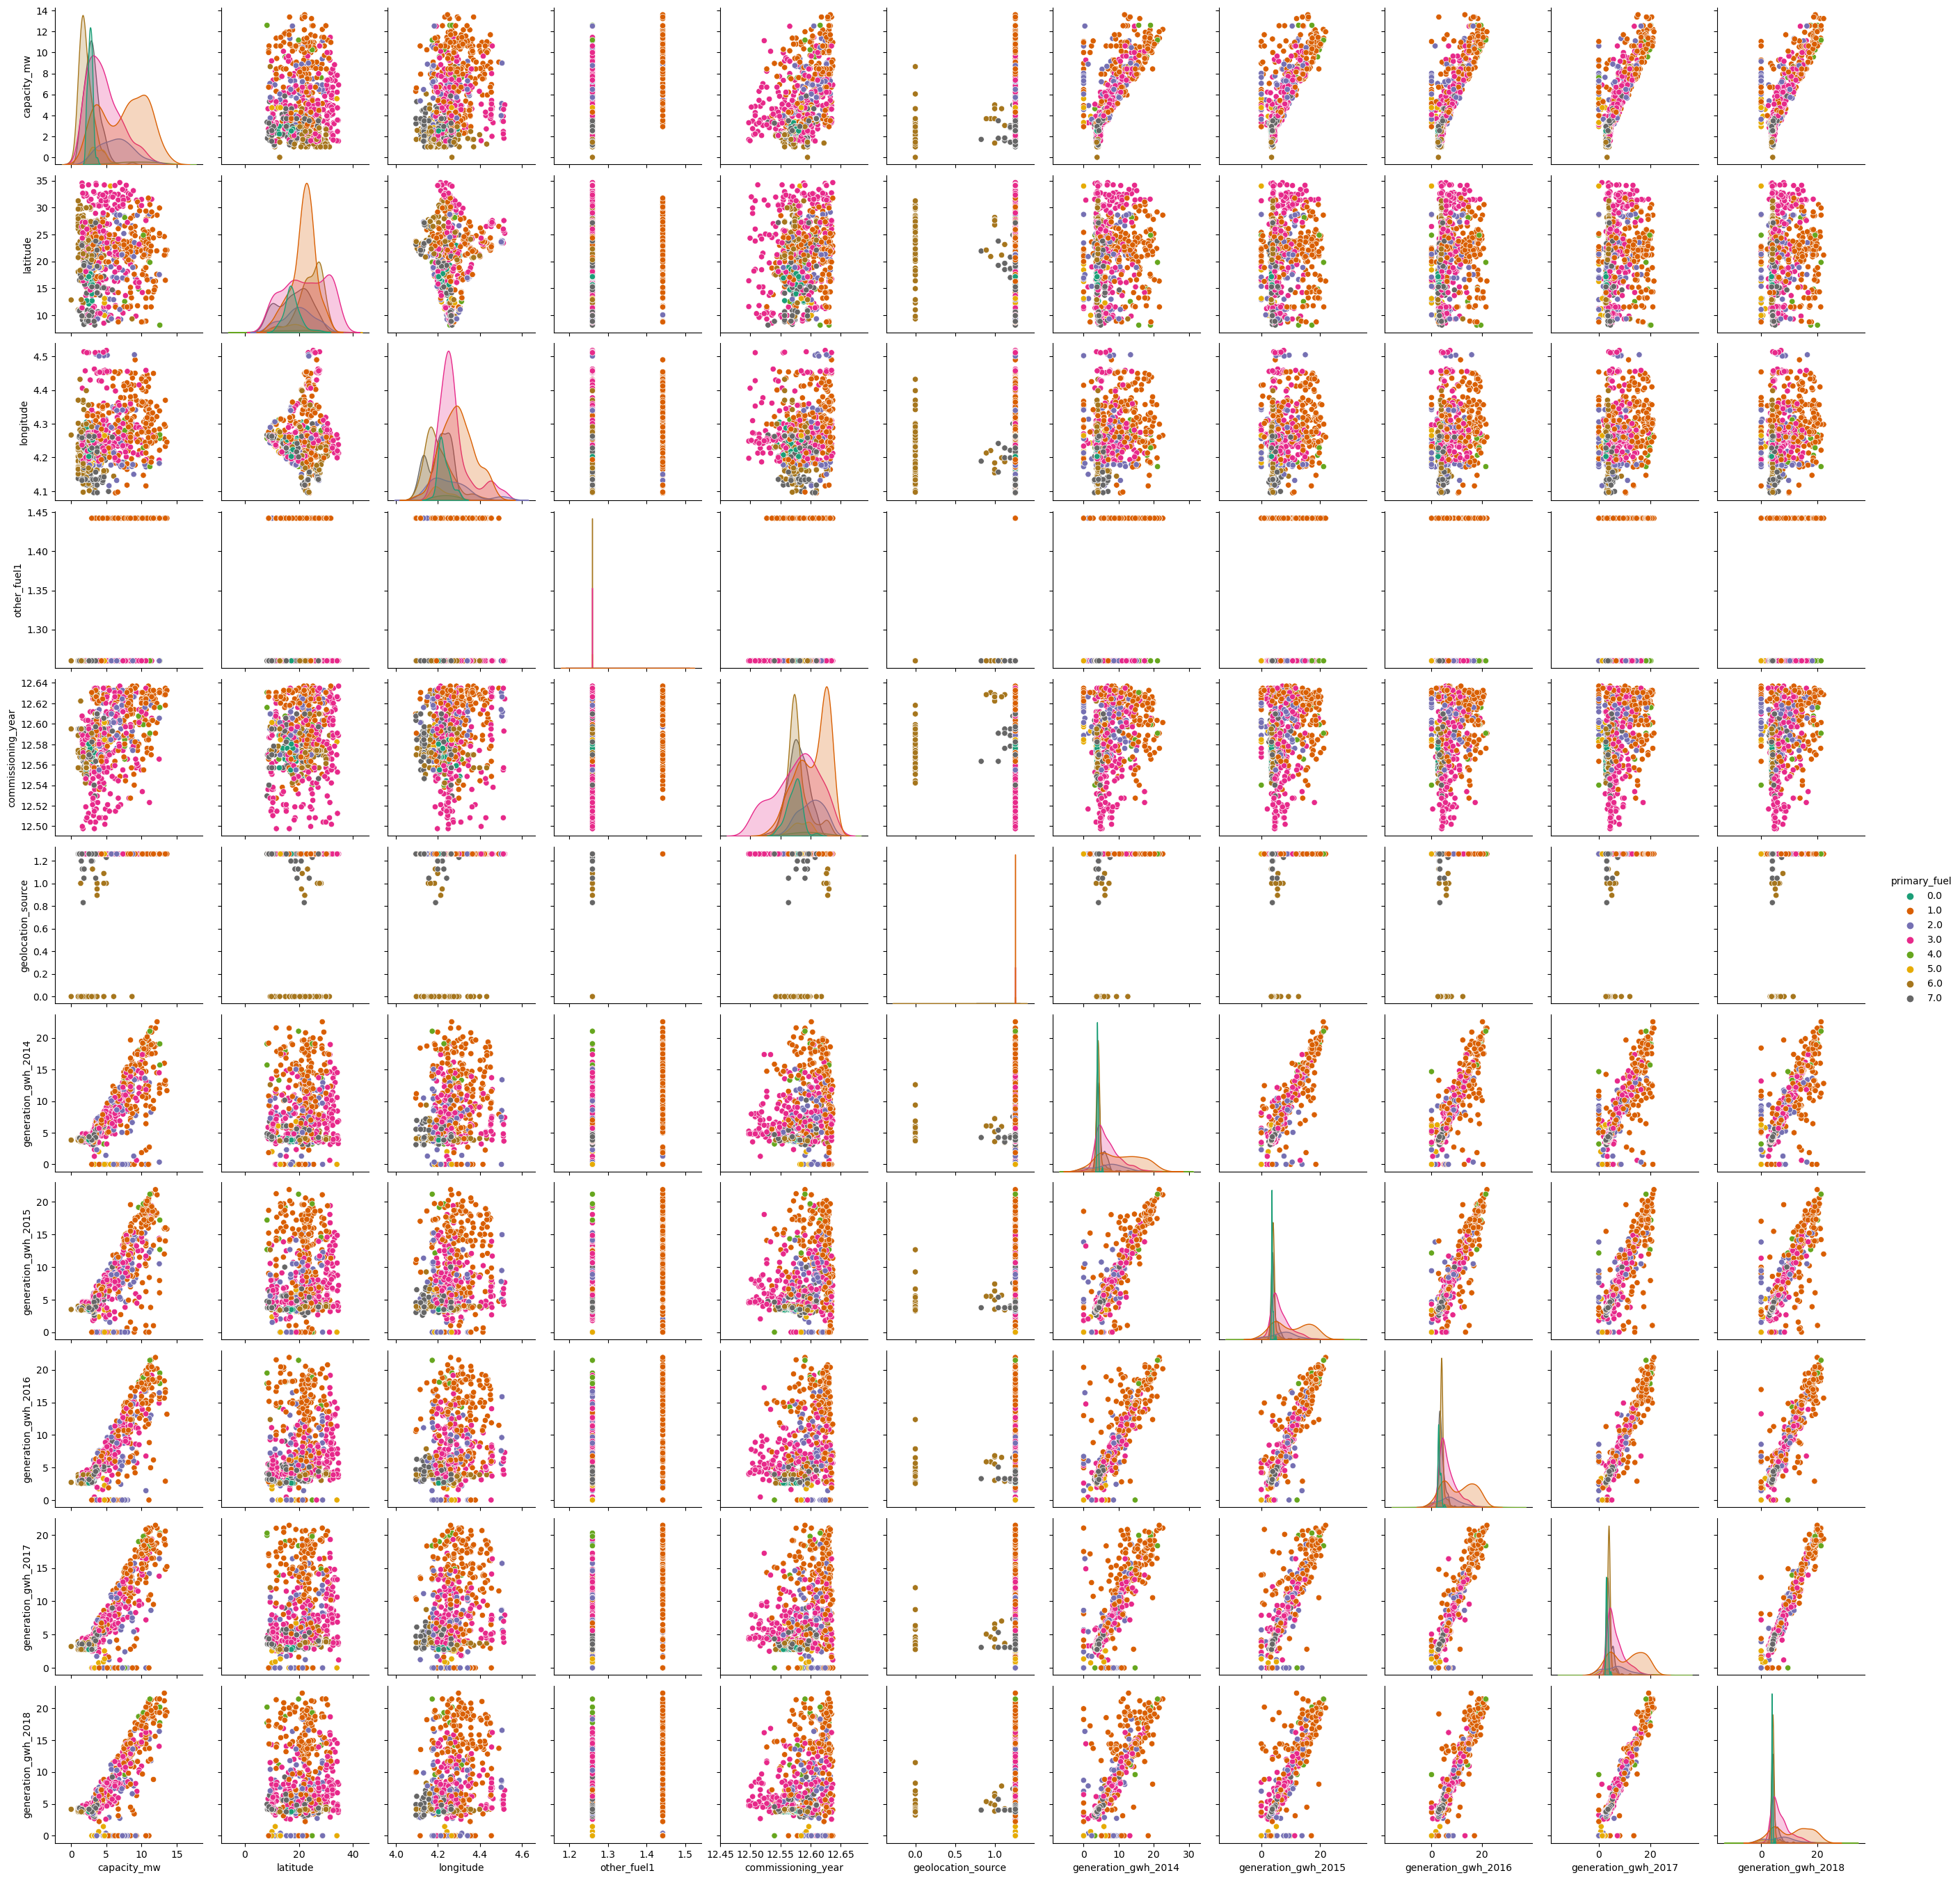

In [480]:
sns.pairplot(df,hue='primary_fuel',palette ='Dark2' )

By analysing the pairplot we can see that
when other_fuel1 is OIL then capacity is maximum.
And capacity is linearly realted with generation_gwh(2014-2018) and it is positive
latitude and longitude is not lineraly related with the capacity
capacity is increasing for the latest commissioning year (positively related)

In [592]:
# Checking correlation

In [481]:
cor = df.corr()

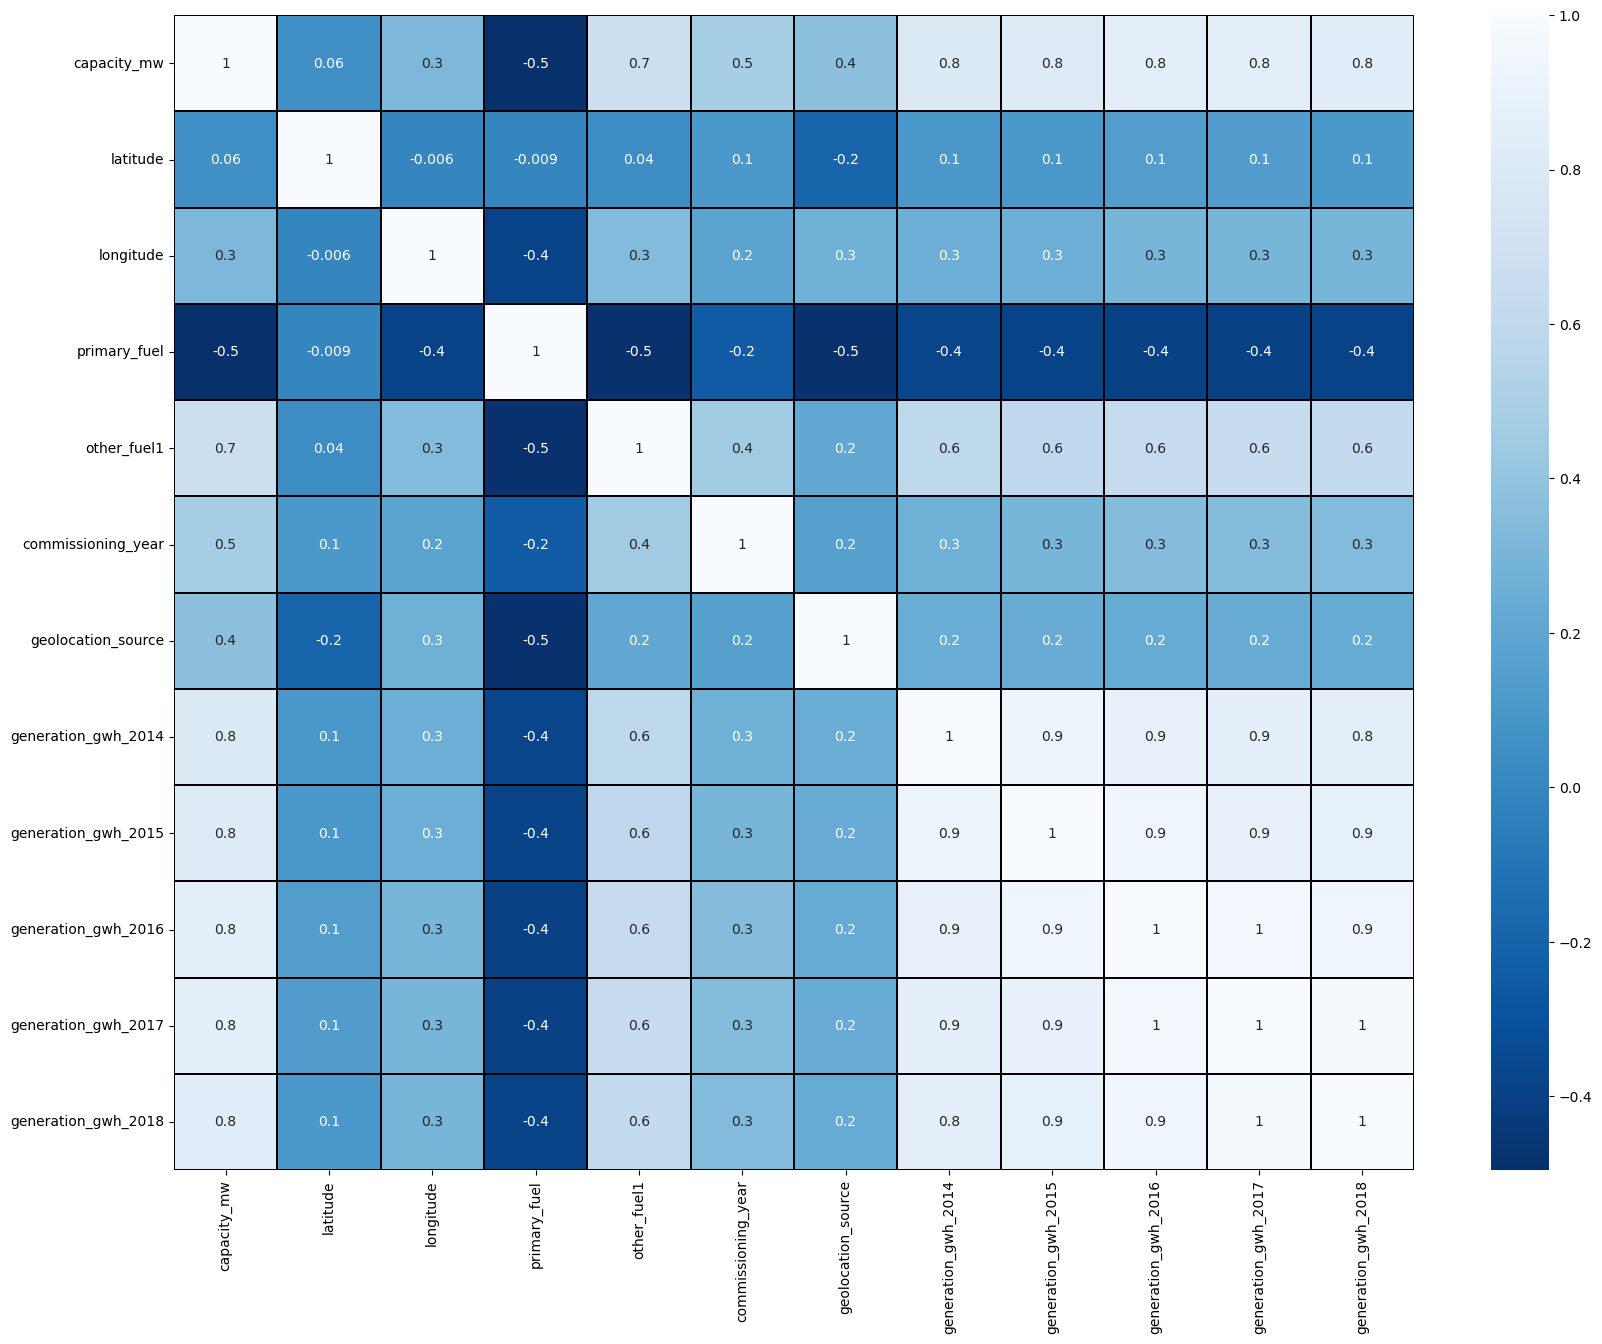

In [482]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

So we can see that primary fuel is comaparetively high negatively correlated with all the columns 

And capacity_mw column is highly positive correlated with all the columns

In [485]:
cor['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2017    0.844914
generation_gwh_2016    0.843928
generation_gwh_2018    0.831472
generation_gwh_2015    0.810897
generation_gwh_2014    0.796319
other_fuel1            0.672030
commissioning_year     0.476280
geolocation_source     0.371865
longitude              0.317079
latitude               0.058491
primary_fuel          -0.495860
Name: capacity_mw, dtype: float64

capacity_mw column has very less correlation with the latitude column and very high with the generation_gwh cols

In [571]:
# separating x and y 

In [487]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [488]:
x

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0     28.1839   4.183928           6.0     1.259921           12.622267   
1     24.7663   4.209822           1.0     1.259921           12.597110   
2     21.9038   4.108947           7.0     1.259921           12.588702   
3     23.8712   4.503868           2.0     1.259921           12.607604   
4     21.9603   4.351694           1.0     1.442250           12.630630   
..        ...        ...           ...          ...                 ...   
902   16.2949   4.260882           1.0     1.442250           12.632719   
903   12.8932   4.275677           6.0     1.259921           12.595009   
904   15.2758   4.228027           7.0     1.259921           12.582389   
905   24.3500   4.193560           1.0     1.259921           12.563411   
906    9.9344   4.263084           7.0     1.259921           12.569743   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0              1.000000             3.593212             3.502693   
1              1.259921             6.701965             5.927231   
2              1.259921             4.303337             3.602957   
3              1.259921             8.516872             9.449397   
4              1.259921            14.479241            18.086385   
..                  ...                  ...                  ...   
902            1.259921             8.801357             0.998289   
903            0.000000             3.723719             3.377802   
904            1.259921             3.839121             3.481049   
905            1.259921             6.998264             6.611916   
906            1.259921             4.363491             3.740557   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0               3.008506             3.137244             3.851362  
1               6.205591             6.349466             6.610442  
2               3.887777             3.303694             2.923503  
3               9.604586             8.723154             8.555526  
4              18.413278            17.528476            19.380155  
..                   ...                  ...                  ...  
902             6.158697             9.529548             8.821590  
903             2.548448             2.765267             3.753347  
904             2.712400             2.765267             3.753347  
905             6.763786             6.726608             7.180199  
906             3.157524             3.568231             4.142454  

[869 rows x 11 columns]

In [489]:
y

0       1.357209
1       4.610436
2       3.396999
3       5.129928
4      12.164404
         ...    
902    11.696071
903     1.442250
904     2.943383
905     4.308869
906     2.545822
Name: capacity_mw, Length: 869, dtype: float64

In [490]:
x.shape,y.shape

((869, 11), (869,))

In [492]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [572]:
# checking vif values for all the cols

In [493]:
ds=pd.DataFrame()
ds['col']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds


col          vif
0              latitude    14.154114
1             longitude  3487.217745
2          primary_fuel     5.222709
3           other_fuel1   623.846477
4    commissioning_year  3916.104553
5    geolocation_source    10.429512
6   generation_gwh_2014    21.348698
7   generation_gwh_2015    33.065585
8   generation_gwh_2016    59.735040
9   generation_gwh_2017    90.743734
10  generation_gwh_2018    60.255553

So longitude,other_fuel1 and commissioning_year has very high vif values.
Lets do the trail and error method. If we did not get the appropriate result then we will remove the columns and test again

In [494]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0    1.138943  -0.877224      1.193940    -0.507541            1.231840   
1    0.583053  -0.554038     -0.977541    -0.507541            0.363238   
2    0.117454  -1.813043      1.628236    -0.507541            0.072931   
3    0.437461   3.115916     -0.543245    -0.507541            0.725577   
4    0.126644   1.216653     -0.977541     1.970285            1.520606   
..        ...        ...           ...          ...                 ...   
864 -0.794861   0.083234     -0.977541     1.970285            1.592738   
865 -1.348164   0.267884      1.193940    -0.507541            0.290697   
866 -0.960622  -0.326827      1.628236    -0.507541           -0.145053   
867  0.515340  -0.757007     -0.977541    -0.507541           -0.800323   
868 -1.829427   0.110718      1.628236    -0.507541           -0.581680   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -0.196377            -0.744072            -0.702430   
1              0.406511            -0.063144            -0.186427   
2              0.406511            -0.588529            -0.681091   
3              0.406511             0.334386             0.563179   
4              0.406511             1.640357             2.401349   
..                  ...                  ...                  ...   
864            0.406511             0.396698            -1.235431   
865           -2.515882            -0.715486            -0.729010   
866            0.406511            -0.690209            -0.707036   
867            0.406511             0.001756            -0.040709   
868            0.406511            -0.575353            -0.651807   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0              -0.764651            -0.731955            -0.654480  
1              -0.108255            -0.091352            -0.098021  
2              -0.584127            -0.698760            -0.841613  
3               0.589595             0.382025             0.294269  
4               2.398113             2.138041             2.477409  
..                   ...                  ...                  ...  
864            -0.117883             0.542841             0.347929  
865            -0.859105            -0.806137            -0.674247  
866            -0.825444            -0.806137            -0.674247  
867             0.006348            -0.016140             0.016889  
868            -0.734055            -0.646004            -0.595771  

[869 rows x 11 columns]

In [574]:
# Importing some basic metrices for evaluation

In [495]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [575]:
# checking the best random_state value

In [496]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestRegressor(n_jobs=-1)
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i

print('max accuracy is :',maxacc,'random state :',maxrs)  

max accuracy is : 0.9498559063402023 random state : 175


In [576]:
# splitting our dataset based on the best random_state value

In [497]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxrs)

In [577]:
# lets make a copy of train and test dataset. so that we will not messed up with anything

In [498]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [578]:
# Importing cross_val_score and randomforestregressor

In [499]:
from sklearn.model_selection import cross_val_score

In [500]:
from sklearn.ensemble import RandomForestRegressor

In [579]:
# Importing SequentialFeatureSelector for the feature selection purpose 

In [501]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [580]:
# using RandomForestRegressor as our base model

In [502]:
RFR = RandomForestRegressor()
sfs = SFS(RFR, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(1, 11),
                          scoring='r2')

In [581]:
# lets check for the best cols given by the SFS

In [503]:
sfs.k_feature_idx_

(0, 1, 3, 4, 6, 7, 8, 10)

So these 8 cols are the best cols as per the analysis of SFS

In [582]:
# Lets check the col names

In [504]:
selected_columns = sfs.k_feature_names_
print("Selected features: ",selected_columns)

Selected features:  ('latitude', 'longitude', 'other_fuel1', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2018')


In [583]:
# Transforming train and test for the new best cols 

In [505]:
x_train_2 = sfs.transform(x_train1)
x_test_2 = sfs.transform(x_test1)

model = RandomForestRegressor()

print("training",np.mean(cross_val_score(model, x_train_2, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_2, y_test, cv=5, scoring='r2')))

training 0.8946814435791766
testing 0.8909509684645484


So we are getting less accuracy when we use sequential feature selection method. so we will not going to use it

In [506]:
x_train

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
167  1.508527   0.170169     -0.108949    -0.507541           -1.970159   
120  1.019944  -1.092455      1.193940    -0.507541           -1.019187   
375  0.467015   0.819481     -0.977541    -0.507541            0.653157   
104 -1.819163  -0.142846      0.759644    -0.507541            0.218133   
783 -2.019880   0.270137     -0.977541     1.970285           -0.727417   
..        ...        ...           ...          ...                 ...   
641  1.013194  -1.121802      1.193940    -0.507541           -0.436040   
707  0.102913   1.572692     -0.977541     1.970285            1.159588   
630  1.079427   0.667814     -0.977541     1.970285            1.159588   
596  0.600685  -0.318031      0.325347    -0.507541            0.435754   
276 -0.741852  -0.224346      1.628236    -0.507541            0.653157   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
167            0.406511            -0.370781            -0.352953   
120           -2.515882            -0.635724            -0.611256   
375            0.406511            -0.254511            -0.267292   
104            0.406511            -1.090938            -0.948885   
783            0.406511             2.667516             2.524252   
..                  ...                  ...                  ...   
641           -2.515882            -0.635724            -0.611256   
707            0.406511             2.775148             2.710418   
630            0.406511             2.821571             2.510484   
596            0.406511             2.647886             2.738658   
276            0.406511            -0.201725            -0.323645   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
167            -0.370807            -0.349865            -0.367447  
120            -0.584286            -0.575688            -0.596282  
375            -0.262798            -0.353069            -0.320240  
104            -1.028533            -1.207576            -1.301891  
783             2.149293             2.009447             2.194039  
..                   ...                  ...                  ...  
641            -0.584286            -0.575688            -0.596282  
707             1.155654             0.745043             0.199111  
630             2.595033             2.473732             1.759721  
596             2.485227             2.583948             2.462327  
276            -0.402450            -0.305588            -0.118932  

[695 rows x 11 columns]

In [584]:
# Importing almost all the regression algorithmns

In [512]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [585]:
# making their instances 

In [513]:
LR=LinearRegression()
RD=Ridge()
LS=Lasso()
EN=ElasticNet()
svr=SVR()
DTR = DecisionTreeRegressor()
GB=GradientBoostingRegressor()
RFR=RandomForestRegressor()
ETR=ExtraTreesRegressor()

In [514]:
loop=[LR,RD,LS,EN,svr,DTR,GB,RFR,ETR]

In [586]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [515]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('r2_score will be :',r2_score(y_test,pred))
    print('mean abs error will be :',mean_absolute_error(y_test,pred))
    print('mean squared error will be :',mean_squared_error(y_test,pred))
    print('root mean squared error will be :',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    score=cross_val_score(i,x_train,y_train,cv=5)
    print(score)
    print('mean CV :',score.mean())
    print("difference between mean CV and r2_score will be :",r2_score(y_test,pred)-score.mean())
    print('\n')

This is for : LinearRegression()
r2_score will be : 0.8672697232568299
mean abs error will be : 0.8516438517509042
mean squared error will be : 1.2484643413472463
root mean squared error will be : 1.1173470102646028


[0.81944302 0.78785428 0.7395241  0.74036013 0.79648737]
mean CV : 0.7767337803805685
difference between mean CV and r2_score will be : 0.09053594287626143


This is for : Ridge()
r2_score will be : 0.8673047103417089
mean abs error will be : 0.8520157599086673
mean squared error will be : 1.2481352519416433
root mean squared error will be : 1.117199736815957


[0.81995023 0.78788123 0.74232563 0.7403785  0.7971405 ]
mean CV : 0.7775352176044533
difference between mean CV and r2_score will be : 0.08976949273725554


This is for : Lasso()
r2_score will be : 0.6625296740999667
mean abs error will be : 1.5279924822734012
mean squared error will be : 3.1742544239869956
root mean squared error will be : 1.7816437421625557


[0.62901986 0.61814523 0.49826445 0.58149699 0.639980

So as per the given observation we can see that extratreesregressor is performing the best. Because it has the r2_score of 95.66% and the errors like mean_absolute_error,
mean_squared_error and root_mean_squared_error is very minimum. And for the cross_val_score, mean CV is 90.30% and the difference between mean CV and the r2_score
is 0.05, this is very less. so thats mean we can say that our model has no overfitting issue

In [516]:
# Importing GridSearch CV for Hyper parameter tuning

In [517]:
from sklearn.model_selection import GridSearchCV

In [519]:
# Importing RandomizedSearchCV because it will take very less time than Grid SearchCv

In [520]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [587]:
# setting the best parameters for ExtraTreesRegressor, to feed this into RCV

In [528]:
parameters = {
    'n_estimators': [50,100,150,200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None,2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    'max_features': ['auto','sqrt','log2',None],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
    'n_jobs':[-1]
}

In [529]:
GCV=GridSearchCV(ExtraTreesRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [530]:
#GCV.fit(x_train,y_train)

In [531]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(ExtraTreesRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [532]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 2, 8, 16, 32, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 150, 200],
                                        'n_jobs': [-1],
                                        'warm_start': [True, False]})

In [588]:
# Checking the best parameters

In [533]:
RCV.best_params_

{'warm_start': False,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 32,
 'criterion': 'absolute_error',
 'bootstrap': False}

In [589]:
# Now use these best parameters to train our model. and this model is going to be our final model 

In [534]:
final_model=ExtraTreesRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_depth=32,bootstrap=False,max_features='log2',criterion='absolute_error',warm_start=False,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc= r2_score(y_test,pred)
print(acc*100)

95.66076234289872


So our final r2_score will be 95.66%

In [535]:
# Lets save our model
import joblib
filename = 'power_plant_capacity.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [590]:
# Lets Test our model

In [538]:
t=np.array([1.508527,	0.170169,	-0.108949,	-0.507541,	-1.970159,	0.406511,	-0.370781,	-0.352953,	-0.370807,	-0.349865,	-0.367447]).reshape(1,-1)
final_model.predict(t)   #3.231652

array([3.23165204])

In [539]:
t=np.array([-2.019880,	0.270137,	-0.977541,	1.970285,	-0.727417,	0.406511,	2.667516,	2.524252,	2.149293,	2.009447,	2.194039]).reshape(1,-1)
final_model.predict(t)  #10.163964

array([10.16396357])

In [536]:
x_train

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
167  1.508527   0.170169     -0.108949    -0.507541           -1.970159   
120  1.019944  -1.092455      1.193940    -0.507541           -1.019187   
375  0.467015   0.819481     -0.977541    -0.507541            0.653157   
104 -1.819163  -0.142846      0.759644    -0.507541            0.218133   
783 -2.019880   0.270137     -0.977541     1.970285           -0.727417   
..        ...        ...           ...          ...                 ...   
641  1.013194  -1.121802      1.193940    -0.507541           -0.436040   
707  0.102913   1.572692     -0.977541     1.970285            1.159588   
630  1.079427   0.667814     -0.977541     1.970285            1.159588   
596  0.600685  -0.318031      0.325347    -0.507541            0.435754   
276 -0.741852  -0.224346      1.628236    -0.507541            0.653157   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
167            0.406511            -0.370781            -0.352953   
120           -2.515882            -0.635724            -0.611256   
375            0.406511            -0.254511            -0.267292   
104            0.406511            -1.090938            -0.948885   
783            0.406511             2.667516             2.524252   
..                  ...                  ...                  ...   
641           -2.515882            -0.635724            -0.611256   
707            0.406511             2.775148             2.710418   
630            0.406511             2.821571             2.510484   
596            0.406511             2.647886             2.738658   
276            0.406511            -0.201725            -0.323645   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
167            -0.370807            -0.349865            -0.367447  
120            -0.584286            -0.575688            -0.596282  
375            -0.262798            -0.353069            -0.320240  
104            -1.028533            -1.207576            -1.301891  
783             2.149293             2.009447             2.194039  
..                   ...                  ...                  ...  
641            -0.584286            -0.575688            -0.596282  
707             1.155654             0.745043             0.199111  
630             2.595033             2.473732             1.759721  
596             2.485227             2.583948             2.462327  
276            -0.402450            -0.305588            -0.118932  

[695 rows x 11 columns]

In [537]:
y_train

169     3.231652
121     2.154435
387     3.684031
105     3.914868
820    10.163964
         ...    
666     1.709976
738     8.434327
654    10.626586
618    10.259856
282     4.653934
Name: capacity_mw, Length: 695, dtype: float64